# Contando Palavras
Neste capítulo iremos começar a interagir com os textos no nível da linguagem, por meio das ferramentas do Processamento de Linguagem Natural (PLN). Vamos progredir gradualmente nossa representação da linguagem a partir da morfologia, passando pela sintaxe e chegando à semântica. 

Nesta etapa, faremos uso de biliotecas especializadas em PLN como o [NLTK](https://www.nltk.org/) e a [Spacy](https://spacy.io/). 

In [19]:
import nltk
import spacy
from collections import Counter
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Bibliotecas de PLN requerem o carregamento de modelos de liguagem para funcionar de maneira apropriada: para este capitulo iremos carregar os modelos específicos da lingua portuguesa. Para isso precisamos executar comandos no terminal do sistema operacional:

In [4]:
!python3 -m spacy download pt

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
⚠ Download successful but linking failed
Creating a shortcut link for 'pt' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('pt_core_news_sm')


In [31]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Para contar as palavras de um texto, é preciso primeiro separá-las uma a uma. A este processo dá-se o nome de tokenização, e é típicamente fácil de fazer mal-feito e difícil de fazer bem-feito.

Primeiramente precisaremos carregar os verbetes com a função que criamos no capítulo 1.

In [6]:
import glob, os
caminho = "../dhbb/text/*.text"
arquivos  = glob.glob(caminho)

def tabula_verbete(n=None):
    """
    Carrega todos os verbetes disponíveis, ou os primeiros n.
    n:  número de verbetes a tabular
    """
    if n is None:
        n = len(arquivos)
    linhas = []
    for a in arquivos[:n]:
        with open (a, 'r') as f:
            verbete = f.read()
        cabeçalho = verbete.split('---')[1]
        campos = {l.split(':')[0].strip() :l.split(':')[1].strip() for l in cabeçalho.split('\n')[:4] if l}
        campos['arquivo'] = os.path.split(a)[1]
        campos['cargos'] = cabeçalho.split('cargos:')[1]
        campos['corpo'] = verbete.split('---')[2]
        linhas.append(campos)
    tabela = pd.DataFrame(data = linhas, columns=['arquivo','title', 'natureza', 'sexo', 'cargos', 'corpo'])
    return tabela

## Tokenização com o nltk

In [7]:
tabela = tabula_verbete(n=10)

In [8]:
palavras = nltk.word_tokenize(tabela.corpo[0])
palavras[:10]

['«',
 'Gabriel',
 'Lopes',
 'Ferraz',
 '»',
 'nasceu',
 'no',
 'Rio',
 'de',
 'Janeiro']

Uma vez "tokenizado" o texto podemos contar as palavras muito simplesmente usando a função `Counter`do Python

In [27]:
c = Counter(palavras)
c.most_common(n=10)

[('de', 25),
 (',', 21),
 ('.', 10),
 ('do', 8),
 ('no', 7),
 ('na', 5),
 ('a', 5),
 ('Rio', 4),
 ('Janeiro', 4),
 ('pleito', 4)]

Outra maneira de fazer isso seria usando o NLTK. Com a vantagem de ainda podermos visualizar graficamente.

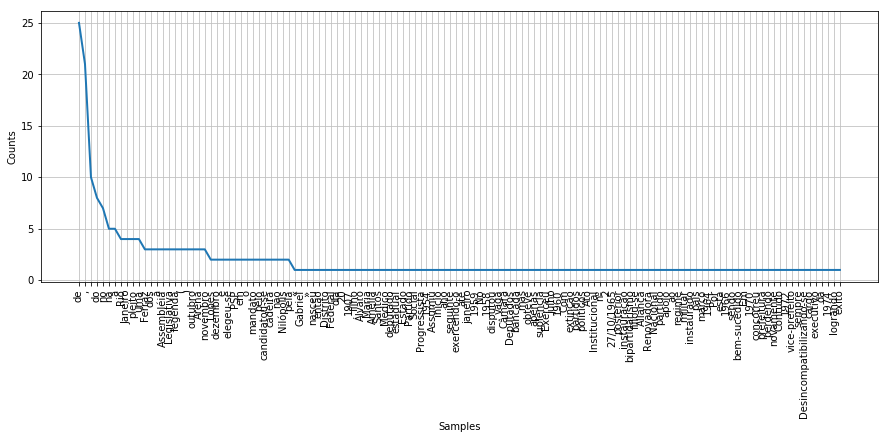

In [28]:
figure(figsize=(15,5))
fd = nltk.FreqDist(palavras)
fd.plot();

Como vemos no exemplo acima, as palavras mais frequentes não muito informativas. Muitas vezes pode ser útil removê-las da análise. Linguistas costumams chamar este tipo de palavras de **stop-words**

In [40]:
sw = nltk.corpus.stopwords.words('portuguese')
from string import punctuation
sw[:5]

['de', 'a', 'o', 'que', 'e']

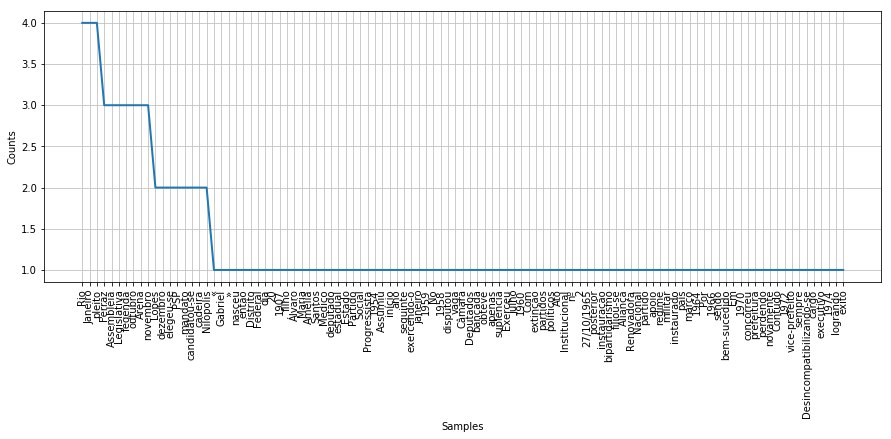

In [42]:
figure(figsize=(15,5))
fd = nltk.FreqDist([p for p in palavras if p not in sw+list(punctuation)])
fd.plot();

# Analizando coleções de textos
Acima analizamos o conteúdo de apenas um verbete, mas seria bem mais relevante podermos fazer a análise em uma coleção de verbetes. Para isso aprenderemos a criar um objeto `TextCollection` que como o nome diz, representa uma coleção de texto, mas que nos permite a realização de análises a nível de coleção.

In [72]:
tc = nltk.TextCollection([nltk.word_tokenize(c) for c in tabela.corpo])

In [75]:
nltk.FreqDist(tc)

FreqDist({',': 727, 'de': 552, '.': 281, 'e': 244, 'do': 239, 'a': 220, 'da': 219, 'em': 184, '(': 168, ')': 168, ...})

In [84]:
tc.concordance('filho')

Displaying 11 of 11 matches:
al , no dia 20 de dezembro de 1907 , filho de Álvaro Lopes Ferraz e de Maria Am
RS ) no dia 11 de dezembro de 1963 , filho de Alberto Desconsi e de Adelina Poz
( PR ) no dia 1º de agosto de 1915 , filho de Kominos Jorge Lacerda e de Anastá
ncisco de San Tiago Dantas e Adonias Filho , entre outros , e formou-se em medi
a ( AL ) no dia 3 de março de 1929 , filho de Antônio Gomes de Melo e Alzira Me
al , no dia 11 de dezembro de 1893 , filho de Manuel José de Amoroso Lima e de 
 de Almeida Júnior e Manuel Lourenço Filho , propondo as bases para uma reforma
vidades e , a convite de Odilo Costa Filho , tornou-se colaborador do « Jornal 
 ( SC ) no dia 23 de abril de 1891 , filho do industrial açoriano Manuel Antôni
P ) no dia 20 de fevereiro de 1943 , filho de Emídio Murad e de Hadige Murad . 
s ( RJ ) no dia 17 de maio de 1913 , filho de João Batista Ribeiro Seixas e de 


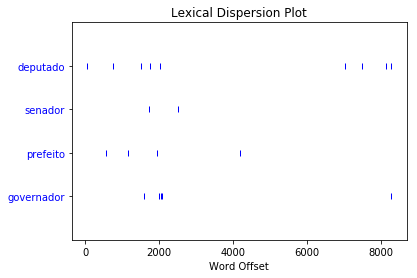

In [82]:
tc.dispersion_plot(['deputado', 'senador', 'prefeito', 'governador'])

# Separando frases
Além de quebrar os textos em seus tokens constituintes, podemos também dividi-los por frases, o que pode ser mais convenientes para certas análises. Para isso utilizamos a função `sent_tokenize` do nltk.

In [100]:
nltk.tokenize.sent_tokenize(tabela.corpo[0])

['\n\n«Gabriel Lopes Ferraz» nasceu no Rio de Janeiro, então Distrito Federal,\nno dia 20 de dezembro de 1907, filho de Álvaro Lopes Ferraz e de Maria\nAmélia dos Santos Ferraz.',
 'Médico, elegeu-se deputado estadual à Assembléia Legislativa do Estado\ndo Rio de Janeiro na legenda do Partido Social Progressista (PSP) em\noutubro de 1954.',
 'Assumiu o mandato no início do ano seguinte,\nexercendo-o até janeiro de 1959.',
 'No pleito de outubro de 1958, disputou\numa vaga, pelo PSP, na Câmara dos Deputados na bancada do Rio de\nJaneiro, mas obteve apenas uma suplência.',
 'Exerceu o mandato de julho a\ndezembro de 1960.',
 'Com a extinção dos partidos políticos pelo Ato Institucional nº 2\n(27/10/1965) e a posterior instauração do bipartidarismo, filiou-se à\nAliança Renovadora Nacional (Arena), partido de apoio ao regime militar\ninstaurado no país em março de 1964.',
 'Por esta legenda, candidatou-se a\numa cadeira na Assembléia Legislativa do Rio de Janeiro no pleito de\noutubro de 